In [15]:
#########################
### Import Code Stuff ###
#########################

### Numpy and Scipy
import numpy as np
from scipy.stats import binned_statistic
from scipy.optimize import minimize

### Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack

#astropy coorindates/units
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### PCA
from sklearn.decomposition import PCA, KernelPCA

### Functions used in this code
import age_functions as afunc

### MCMC
# import emcee
# import time
# import mcmc as mc

### Geometry
import lmcgeometry as lgeo

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

import pandas as pd

import glob

In [16]:
### Must uncomment column names in header of MIST file !!!
def readmist(file):
    '''
    Read in MIST isochrone file and output astropy table
    '''
    with open(file) as f:
        df = pd.read_csv(file,comment='#',header='infer',sep='\s+')
        table_out = Table.from_pandas(df)
    return table_out

### read in MIST files
tabs = []
for i in tqdm_notebook(glob.glob('../../MIST/*.iso.cmd')):
    tabs.append(readmist(i))
    
### Create single table of MIST files
mist = vstack(tabs)

In [35]:
lmc = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.r13-l33-58672.fits.gz',1)
cln = np.where((lmc['FE_H']>-9999.0)&(lmc['AK_TARG']>-9999.0)&(lmc['LOGG']>0.0)&(lmc['M_H_ERR']>-90.0)&
                (lmc['C_FE']>-9999.0)&(lmc['N_FE']>-9999.0))

lmc = lmc[cln]

In [21]:
mist.columns

<TableColumns names=('EEP','log10_isochrone_age_yr','initial_mass','star_mass','log_Teff','log_g','log_L','[Fe/H]_init','[Fe/H]','Bessell_U','Bessell_B','Bessell_V','Bessell_R','Bessell_I','2MASS_J','2MASS_H','2MASS_Ks','Kepler_Kp','Kepler_D51','Hipparcos_Hp','Tycho_B','Tycho_V','Gaia_G_DR2Rev','Gaia_BP_DR2Rev','Gaia_RP_DR2Rev','Gaia_G_MAW','Gaia_BP_MAWb','Gaia_BP_MAWf','Gaia_RP_MAW','TESS','Gaia_G_EDR3','Gaia_BP_EDR3','Gaia_RP_EDR3','phase')>

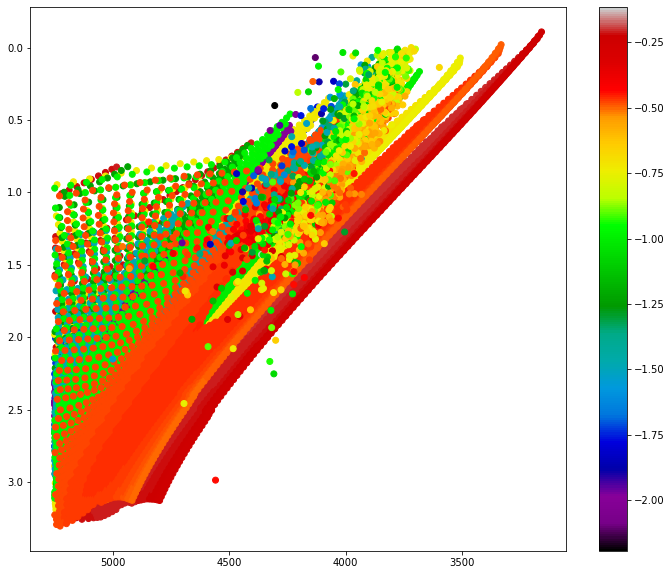

In [45]:
rgb = np.where((mist['EEP']<=605)&(mist['EEP']>=495)&(10**mist['log_Teff']<=5250)&(mist['[Fe/H]']>=-2.0)&
               (mist['[Fe/H]']<=0.0))

plt.figure(figsize=[12,10])
plt.scatter(10**mist['log_Teff'][rgb],mist['log_g'][rgb],c=mist['[Fe/H]'][rgb],cmap='nipy_spectral',
            vmin=min(lmc['FE_H']),vmax=max(lmc['FE_H']))
plt.scatter(lmc['TEFF'],lmc['LOGG'],c=lmc['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [5]:
test

EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,2MASS_J,2MASS_H,2MASS_Ks,Kepler_Kp,Kepler_D51,Hipparcos_Hp,Tycho_B,Tycho_V,Gaia_G_DR2Rev,Gaia_BP_DR2Rev,Gaia_RP_DR2Rev,Gaia_G_MAW,Gaia_BP_MAWb,Gaia_BP_MAWf,Gaia_RP_MAW,TESS,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,5.0,0.1,0.09999999291980904,3.4112994931459166,3.1278625269432663,-1.0898726719133487,0.5,0.590904,12.902215,13.344151,13.125383,10.838778,8.537301,5.311714,4.757349,4.455169000000001,10.360054,13.403332999999998,12.251068,13.188898000000002,13.391098000000001,9.927847,13.123783,8.541837,10.05081,13.093036999999999,13.065309,8.505980000000001,8.194984,10.059464,13.101645,8.529603999999999,-1.0
1,5.0,0.1118149491807284,0.11181494133367513,3.4225984271138508,3.0866590922905504,-0.9618633156489472,0.5,0.590904,12.461664,12.849159,12.549383,10.363656,8.111536,5.001793,4.411633,4.145166000000001,9.919497,12.848811999999999,11.755154,12.705630000000001,12.814865,9.524308999999999,12.574127,8.15018,9.635149,12.541378,12.519758,8.11542,7.822181,9.644717,12.550951,8.136448,-1.0
2,5.0,0.11507386934065995,0.11507386091848552,3.4254814967254976,3.0801348919551845,-0.9323294910948072,0.5,0.590904,12.357075,12.731015,12.410981,10.250778,8.011147,4.93051,4.331053,4.073793,9.815372,12.715824000000001,11.637003,12.590212,12.676408,9.42954,12.442333,8.058411999999999,9.537317999999999,12.409078,12.388988000000001,8.02393,7.735166,9.547117,12.41889,8.044302,-1.0
3,5.0,0.1183462318867235,0.11834622285199428,3.4284103640481023,3.0737720686180765,-0.9027265110174358,0.5,0.590904,12.251828,12.612259,12.271969,10.137526,7.910499000000001,4.859072,4.250044,4.002211,9.710958,12.582262,11.518419999999999,12.474163,12.537342,9.334558,12.309944,7.966455000000001,9.439250999999999,12.276176,12.257622,7.932252,7.647993,9.449283,12.286228999999999,7.9519660000000005,-1.0
4,5.0,0.12163038838487494,0.12163037869852852,3.4313866203477934,3.06758314884772,-0.8730663424191445,0.5,0.590904,12.145928999999999,12.49288,12.132307,10.023883,7.809589,4.787513,4.168639,3.9304550000000003,9.60625,12.448093,11.399386999999999,12.357477000000001,12.397631,9.239367999999999,12.176931,7.874318,9.340950999999999,12.142647,12.125632000000001,7.840397,7.560675,9.351214,12.152937,7.8594479999999995,-1.0
5,5.0,0.12492441295058065,0.1249244025719761,3.434411998466929,3.061581789079441,-0.8433624929962346,0.5,0.590904,12.039402,12.372883,11.991982,9.909854,7.708428,4.7158690000000005,4.086873000000001,3.858562,9.501253,12.313303999999999,11.2799,12.240164,12.257256,9.143985,12.043284,7.7820149999999995,9.242428,12.008476,11.993008999999999,7.74838,7.47323,9.252925999999999,12.019007,7.766762,-1.0
6,5.0,0.12822610355515796,0.12822609244214572,3.437487101940258,3.0557819908581854,-0.8136343053164085,0.5,0.590904,11.932281,12.252289,11.850992999999999,9.795453,7.607039,4.64419,4.0048,3.7865860000000002,9.395991,12.1779,11.159972999999999,12.122246,12.11622,9.048435000000001,11.909011,7.689578,9.143706,11.873673,11.859759,7.65623,7.385694,9.154442,11.884441,7.673938000000001,-1.0
7,5.0,0.13153999477556194,0.13153998288320468,3.4406187986254806,3.05018328216065,-0.783837865941937,0.5,0.590904,11.824589,12.130877,11.709060000000001,9.680466000000001,7.50524,4.5723720000000005,3.9222989999999998,3.7144239999999997,9.290271,12.041615,11.039378999999998,12.003511,11.974239,8.95255,11.773846,7.596845,9.044611999999999,11.737971,11.725625,7.563787,7.297917,9.055586,11.74898,7.580814,-1.0
8,5.0,0.13487537974710614,0.13487536702668804,3.443820525692177,3.044773790693986,-0.7538748251089914,0.5,0.590904,11.716616,12.008184,11.565616,9.564451,7.402651,4.500183,3.839097,3.64184499